## Train Model

In [1]:
import h5py
import sys
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import tensorflow as tf
import sys
sys.path.append('/home/ztang/multitask_RNA/evaluation/rep_learning/')
import mpra_model
from sklearn import model_selection
import scipy.stats
celltype = 'HepG2'
file = '/home/ztang/multitask_RNA/data/lenti_MPRA/'+celltype+'_onehot.h5'
save_model = '/home/ztang/multitask_RNA/model/lenti_MPRA_onehot/'+celltype+'/base_CNN_model.h5'

2023-05-15 10:08:50.210881: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 10:08:50.766639: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
f = h5py.File(file, 'r')
x = f['onehot'][()]
y = f['target'][()]
x = np.swapaxes(x,1,2)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1,random_state=42)

In [3]:
cnn_config = {
    'activation':'exponential',
    'reduce_dim': 196,
    'conv1_filter':196,
    'conv1_kernel':7,
    'dropout1':0.2,
    'res_pool':5,
    'res_dropout':0.2,
    'conv2_filter':256,
    'conv2_kernel':7,
    'pool2_size':4,
    'dropout2':0.2,
    'dense':512,
    'dense2':256,
    'l_rate':0.0001
}
model=mpra_model.rep_cnn((230,4),cnn_config)

2023-05-12 10:59:28.410872: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78865 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:07:00.0, compute capability: 8.0
/home/ztang/.conda/envs/jax_tf/lib/python3.9/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [4]:
#model = mpra_model.ResNet((230,4),1)
earlyStopping_callback = tf.keras.callbacks.EarlyStopping(
            patience=10, restore_best_weights=True
        )
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.2,
            patience=5, min_lr=1e-6)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

checkpoint = tf.keras.callbacks.ModelCheckpoint(save_model,
                                    monitor='val_loss',
                                    save_best_only=True,
                                    mode = 'min',
                                    save_freq='epoch',)
model.compile(
                loss="mean_squared_error",
                metrics=["mse", "mae"],
                optimizer=optimizer,
            )

In [5]:
result = model.fit(x_train,y_train,
        batch_size=128,
        validation_split=0.1,
        epochs=100,
        shuffle=True,
        verbose=2,
        callbacks=[earlyStopping_callback,checkpoint,reduce_lr],
    )


Epoch 1/100


2023-05-12 10:59:36.192418: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-12 10:59:36.804465: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-12 10:59:36.807767: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x5644cf687630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-12 10:59:36.807786: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA A100 80GB PCIe, Compute Capability 8.0
2023-05-12 10:59:36.811503: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-12 10:59:36.922359: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the pro

1432/1432 - 13s - loss: 0.1996 - mse: 0.1996 - mae: 0.3418 - val_loss: 0.1770 - val_mse: 0.1770 - val_mae: 0.3231 - lr: 0.0010 - 13s/epoch - 9ms/step
Epoch 2/100
1432/1432 - 7s - loss: 0.1708 - mse: 0.1708 - mae: 0.3154 - val_loss: 0.2039 - val_mse: 0.2039 - val_mae: 0.3623 - lr: 0.0010 - 7s/epoch - 5ms/step
Epoch 3/100
1432/1432 - 7s - loss: 0.1602 - mse: 0.1602 - mae: 0.3058 - val_loss: 0.1917 - val_mse: 0.1917 - val_mae: 0.3371 - lr: 0.0010 - 7s/epoch - 5ms/step
Epoch 4/100
1432/1432 - 8s - loss: 0.1521 - mse: 0.1521 - mae: 0.2978 - val_loss: 0.1809 - val_mse: 0.1809 - val_mae: 0.3331 - lr: 0.0010 - 8s/epoch - 5ms/step
Epoch 5/100
1432/1432 - 8s - loss: 0.1454 - mse: 0.1454 - mae: 0.2913 - val_loss: 0.1483 - val_mse: 0.1483 - val_mae: 0.2968 - lr: 0.0010 - 8s/epoch - 5ms/step
Epoch 6/100
1432/1432 - 7s - loss: 0.1390 - mse: 0.1390 - mae: 0.2850 - val_loss: 0.1885 - val_mse: 0.1885 - val_mae: 0.3276 - lr: 0.0010 - 7s/epoch - 5ms/step
Epoch 7/100
1432/1432 - 7s - loss: 0.1343 - mse: 0

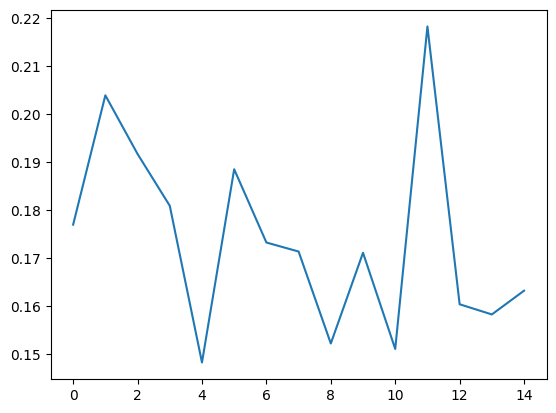

In [6]:
import matplotlib.pyplot as plt
plt.plot(result.history['val_loss'])

In [11]:
y_pred = model.predict(x_test)
scipy.stats.pearsonr(np.squeeze(y_pred),y_test)

708/708 [==============================] - 1s 888us/step


PearsonRResult(statistic=0.7036211396663091, pvalue=0.0)

## Test model on corresponding CAGI

In [1]:
import tensorflow as tf
from tensorflow import keras
import h5py
import scipy.stats
import numpy as np
import os
import pandas as pd
from sklearn import model_selection
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
celltype = 'HepG2'

2023-05-30 11:34:22.623399: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 11:34:23.313575: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = keras.models.load_model('/home/ztang/multitask_RNA/model/lenti_MPRA_onehot/'+celltype+'/ResNet.h5')

2023-05-30 11:34:26.062872: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78865 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:07:00.0, compute capability: 8.0
/home/ztang/.conda/envs/jax_tf/lib/python3.9/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [3]:
f = h5py.File('/home/ztang/multitask_RNA/data/lenti_MPRA/'+celltype+'_onehot.h5', 'r')
x = f['onehot'][()]
y = f['target'][()]
x = np.swapaxes(x,1,2)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1,random_state=42)
model.evaluate(x_test,y_test)

2023-05-30 11:34:29.054550: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


 80/438 [====>.........................] - ETA: 0s - loss: 0.2798 - mse: 0.2798 - mae: 0.3904 

2023-05-30 11:34:29.606967: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


438/438 [==============================] - 2s 2ms/step - loss: 0.2749 - mse: 0.2749 - mae: 0.3891


[0.2749405801296234, 0.2749405801296234, 0.38910195231437683]

In [4]:
y_pred = model.predict(x_test)
scipy.stats.pearsonr(np.squeeze(y_pred),y_test)

438/438 [==============================] - 1s 1ms/step


PearsonRResult(statistic=0.7467120731312961, pvalue=0.0)

In [5]:
file = h5py.File("/home/ztang/multitask_RNA/data/CAGI/"+celltype+"/onehot.h5", "r")
alt = file['alt']
ref = file['ref']
alt_pred = model.predict(alt)
ref_pred = model.predict(ref)
pred = alt_pred - ref_pred
pred.shape

114/114 [==============================] - 0s 2ms/step


(3647, 1)

In [7]:
exp_df = pd.read_csv('/home/ztang/multitask_RNA/data/CAGI/'+celltype+'/metadata.csv')
target = exp_df['6'].values.tolist()

In [8]:
start_idx=0
perf = []
for exp in exp_df['8'].unique():
    sub_df = exp_df[exp_df['8'] == exp]
    exp_target = np.array(target)[sub_df.index.to_list()]
    exp_pred = np.squeeze(pred)[sub_df.index.to_list()]
    print(exp)
    perf.append(scipy.stats.pearsonr(exp_pred,exp_target)[0])
    print(scipy.stats.pearsonr(exp_pred,exp_target)[0])

LDLR
0.5142324165067679
SORT1
0.4413440653055404
F9
0.5024588640603587


In [9]:
np.mean(perf)

0.4860117819575556

## Test Model on all CAGI

In [6]:
import tensorflow as tf
from tensorflow import keras
import h5py
import scipy.stats
import numpy as np
import os
import pandas as pd
from sklearn import model_selection
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
celltype = 'HepG2'

In [7]:
model = keras.models.load_model('/home/ztang/multitask_RNA/model/lenti_MPRA_onehot/'+celltype+'/model.h5')

/home/ztang/.conda/envs/jax_tf/lib/python3.9/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [8]:
file = h5py.File("/home/ztang/multitask_RNA/data/CAGI/230/CAGI_onehot.h5", "r")
alt = file['alt']
ref = file['ref']
alt_pred = model.predict(alt)
ref_pred = model.predict(ref)
pred = alt_pred - ref_pred
pred.shape

577/577 [==============================] - 1s 2ms/step


(18442, 1)

In [4]:
cagi_df = pd.read_csv('../../data/CAGI/230/final_cagi_metadata.csv',
                      index_col=0).reset_index()
exp_list = cagi_df['8'].unique()
target = cagi_df['6'].values.tolist()

In [5]:
import scipy.stats as stats
perf = []
sanity_check = 0
for exp in cagi_df['8'].unique():
    sub_df = cagi_df[cagi_df['8'] == exp]
    sanity_check += len(sub_df)
    exp_target = np.array(target)[sub_df.index.to_list()]
    exp_pred = np.squeeze(pred)[sub_df.index.to_list()]
    print(exp)
    perf.append(stats.pearsonr(exp_pred,exp_target)[0])
    print(stats.pearsonr(exp_pred,exp_target)[0])

ZFAND3
0.15465819899600972
HBG1
0.500305593364831
MSMB
0.15821832204934658
LDLR
0.5142324165067679
MYCrs6983267
0.10543490873494954
SORT1
0.4413440653055404
PKLR
0.15013411708997187
F9
0.5024588640603587
TERT-HEK293T
0.34290043918129154
IRF6
0.12146037283839597
HBB
0.4180177630054858
TERT-GBM
0.47675383572259294
IRF4
0.35491145901932336
GP1BB
0.3457299743434953
HNF4A
0.21191333064947326


In [7]:
np.mean(perf)

0.31989824787275883

: 